# Game Of Life By John Conwey

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [184]:
class World():
    def __init__(self, row_count=10, col_count=10) -> None:
        self.row_count = row_count
        self.col_count = col_count
        self.alive_entities_count = 0
        self.map = np.zeros((row_count, col_count))
    
    def __make_alive(self, i, j):
        if i > self.row_count or j > self.col_count:
            raise IndexError("Index out of range!")
        
        if self.map[i][j] != 1:
            self.map[i][j] = 1
            self.alive_entities_count += 1
    
    def __make_dead(self, i, j):
        if i > self.row_count or j > self.col_count:
            raise IndexError("Index out of range!")
        
        if self.map[i][j] != 0:
            self.map[i][j] = 0
            self.alive_entities_count -= 1
            
    def __clear_the_border_line(self):
        self.map[0,:] = 0
        self.map[-1,:] = 0
        self.map[:,0] = 0
        self.map[:,-1] = 0
        
    def next_step(self):
        mask = [
            [1,1,1],
            [1,0,1],
            [1,1,1]
        ]
        mask = np.array(mask)
        
        entities_to_set_alive = []
        entities_to_set_dead = []
        for i in range(1, self.row_count - 1):
            for j in range(1, self.col_count - 1):
                sub_map = self.map[i-1:i+2, j-1:j+2]
                res = sum(sum(np.multiply(sub_map, mask)))
                
                if res < 2 or res > 3: # death ny underpopulation and overpopulation
                    entities_to_set_dead.append((i,j))
                elif not self.is_alive(i, j) and res == 3: # Reproduction
                    entities_to_set_alive.append((i,j))
                    
        for i in entities_to_set_alive:
            self.__make_alive(i[0], i[1])
        for i in entities_to_set_dead:
            self.__make_dead(i[0], i[1])

    def set_random_map(self):
        self.map = np.random.choice([0, 1], size=(self.row_count, self.col_count), p=[0.8, 0.2])
        self.__clear_the_border_line()
        self.alive_entities_count = np.count_nonzero(self.map == 1)
    
    def transform_to_matrix_indices(self, x, y):
        middle = self.get_origin_indices()
        return (x + middle, y + middle)
    
    def get_origin_indices(self):
        return (self.row_count // 2, self.col_count // 2)
            
    def is_alive(self, i, j, middle_as_origin=False):
        if middle_as_origin:
                i, j = self.transform_to_matrix_indices(i, j)
                
        if i > self.row_count or j > self.col_count:
            raise IndexError("Index out of range!")
        
        return self.map[i][j] == 1
            
    def set_alive_entities(self, entity_list, middle_as_origin=False):
        for entity in entity_list:
            indeces = (entity[0], entity[1])
            if middle_as_origin:
                indeces = self.transform_to_matrix_indices(indeces[0], indeces[1])
            self.__make_alive(indeces[0], indeces[1])

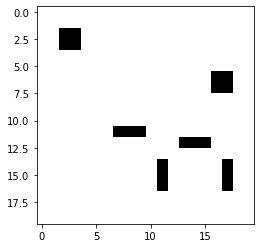

In [188]:
world = World(20,20)
world.set_random_map()

fig = plt.figure()
img = plt.imshow(world.map, cmap='binary', interpolation='nearest')
    
def animate(i):
    world.next_step()
    img.set_data(world.map)
    return img

anim = FuncAnimation(fig, animate, frames=200,
                               interval=100)

anim.save("output.mp4")

## What is this game about?

The game of life is a simple game (or maybe the word 'simulation' would better describe it) with an infinite grid and each cell could either be dead or alive. The rules of the game is simple:
1. A live cell with 2 or 3 alive neighbors remains alive to the next generation (survival)
2. A live cell with less than 2 or more than 3 alive neighbors dies (due to underpopulation and overpopulation)
3. A dead cell with exactly 3 alive neighbors becomes a live cell (reproduction)

You can set out different initial patterns and let game go on and see how the world turns out to be! Some patterns happen to go extinct while some other grow bigger and bigger as the generations go on. Also there are patterns that stay still through out the time or keep alternating in a few different states. The beauty of this game to me personally, is that it is a good demonstration of the emergence of complexity from simplicity.

### A Quick Q&A

- What are the main challenges of the implementation of the game?

    The actual game is meant to be played on an infinite grid, which I yet have no idea how to achive (I'm open to any ideas btw)

- Why was this code created?

    Out of bordem.

- How to read the code?

    I haven't written any documentation for the code since it's pretty much simple and straight forward and anyone with basic python programming knowledge should be fine with code.